**Machine Learning Assignment 3**

Bob Knox

# Imports

In [1]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import time
from operator import itemgetter

# Get Data

In [2]:
#read in the file
df = pd.read_csv('ProviderInfo.csv',sep=',',header='infer',index_col=None)



In [3]:
#get just the numeric columns
df_numeric = df.select_dtypes(np.number)
df_numeric.head()

,ZIP,PHONE,COUNTY_SSA,BEDCERT,RESTOT,OVERALL_RATING,SURVEY_RATING,QUALITY_RATING,STAFFING_RATING,RN_STAFFING_RATING,...,ADJ_AIDE,ADJ_LPN,ADJ_RN,ADJ_TOTAL,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT
0,35653.0,2.563324e+09,290.0,57.0,51.5,5.0,5.0,5.0,4.0,4.0,...,3.11741,1.24750,0.83853,5.13047,0.0,0.0,0.0,0.0,0.0,0.0
1,35150.0,2.562496e+09,600.0,85.0,74.2,3.0,3.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,15259.0,1.0,2.0
2,35768.0,2.562184e+09,350.0,50.0,NaN,1.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,35206.0,2.058330e+09,360.0,92.0,79.8,2.0,2.0,4.0,3.0,3.0,...,2.40074,0.86962,0.56463,3.83026,0.0,1.0,0.0,0.0,0.0,0.0
4,35111.0,2.054776e+09,360.0,103.0,98.1,3.0,3.0,4.0,3.0,2.0,...,2.55126,1.08955,0.30360,3.95709,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#review columns
df_numeric.columns

Index(['ZIP', 'PHONE', 'COUNTY_SSA', 'BEDCERT', 'RESTOT', 'OVERALL_RATING',
       'SURVEY_RATING', 'QUALITY_RATING', 'STAFFING_RATING',
       'RN_STAFFING_RATING', 'AIDHRD', 'VOCHRD', 'RNHRD', 'TOTLICHRD',
       'TOTHRD', 'PTHRD', 'EXP_AIDE', 'EXP_LPN', 'EXP_RN', 'EXP_TOTAL',
       'ADJ_AIDE', 'ADJ_LPN', 'ADJ_RN', 'ADJ_TOTAL', 'INCIDENT_CNT',
       'CMPLNT_CNT', 'FINE_CNT', 'FINE_TOT', 'PAYDEN_CNT', 'TOT_PENLTY_CNT'],
      dtype='object')

ZIP, PHONE, COUNTY_SSA can be removed

In [5]:
df_numeric = df_numeric.drop(['ZIP','COUNTY_SSA','PHONE'],axis=1)
df_numeric.columns

Index(['BEDCERT', 'RESTOT', 'OVERALL_RATING', 'SURVEY_RATING',
       'QUALITY_RATING', 'STAFFING_RATING', 'RN_STAFFING_RATING', 'AIDHRD',
       'VOCHRD', 'RNHRD', 'TOTLICHRD', 'TOTHRD', 'PTHRD', 'EXP_AIDE',
       'EXP_LPN', 'EXP_RN', 'EXP_TOTAL', 'ADJ_AIDE', 'ADJ_LPN', 'ADJ_RN',
       'ADJ_TOTAL', 'INCIDENT_CNT', 'CMPLNT_CNT', 'FINE_CNT', 'FINE_TOT',
       'PAYDEN_CNT', 'TOT_PENLTY_CNT'],
      dtype='object')

# Handle NaN & NaT

In [6]:
df_numeric.replace(["NaN", 'NaT'], np.nan, inplace = True)
cleaned_df= df_numeric.dropna(how='any', axis = 0)
cleaned_df.head()

,BEDCERT,RESTOT,OVERALL_RATING,SURVEY_RATING,QUALITY_RATING,STAFFING_RATING,RN_STAFFING_RATING,AIDHRD,VOCHRD,RNHRD,...,ADJ_AIDE,ADJ_LPN,ADJ_RN,ADJ_TOTAL,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT
0,57.0,51.5,5.0,5.0,5.0,4.0,4.0,3.43572,1.16495,0.66830,...,3.11741,1.24750,0.83853,5.13047,0.0,0.0,0.0,0.0,0.0,0.0
3,92.0,79.8,2.0,2.0,4.0,3.0,3.0,2.32722,0.82104,0.52177,...,2.40074,0.86962,0.56463,3.83026,0.0,1.0,0.0,0.0,0.0,0.0
4,103.0,98.1,3.0,3.0,4.0,3.0,2.0,2.33617,0.92407,0.23493,...,2.55126,1.08955,0.30360,3.95709,0.0,0.0,0.0,0.0,0.0,0.0
5,149.0,119.7,5.0,3.0,5.0,4.0,3.0,2.57869,1.01443,0.41055,...,2.56783,1.04823,0.46444,4.07866,0.0,1.0,0.0,0.0,0.0,0.0
6,124.0,96.0,5.0,4.0,5.0,3.0,4.0,1.99985,0.62768,0.59598,...,2.12102,0.70311,0.75448,3.52979,1.0,1.0,0.0,0.0,0.0,0.0


# Create Train & Test (80/20)

In [7]:
#define predictors to not be OVERALL_RATING
predictors = [col for col in cleaned_df.columns if col != 'OVERALL_RATING']

#create working dataframes
dfX = np.array(cleaned_df[predictors])
dfy = np.array(cleaned_df['OVERALL_RATING'])


#Build train & test using sklearn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.20, random_state=42)


In [9]:
#scale the training data
scaler_train = StandardScaler(copy=False,with_mean=True, with_std=True)
scaler_train.fit(X_train)
X_train_scaled = scaler_train.transform(X_train)
#scale the testing data using teh same scaler as train
X_test_scaled=scaler_train.transform(X_test)

# Model 1 - Logistic Regression

In [10]:
#actively defined solver & multi-class in order to eliminate warning messages
log_reg = LogisticRegression(random_state=2,solver='newton-cg',multi_class='ovr')
reg = log_reg.fit(X_train_scaled, y_train)
#get the predicted values of yhat
yhat_sk = reg.predict(X_test_scaled)

## Score

In [11]:
reg.score(X_test_scaled, y_test)

0.6895604395604396

## Confusion Matrix

Confusion matrix, without normalization
[[243  65   0   0   0]
 [ 62 410  97   7   0]
 [  0 203  64 231   0]
 [  0  90  16 489  99]
 [  0   0   0  34 802]]


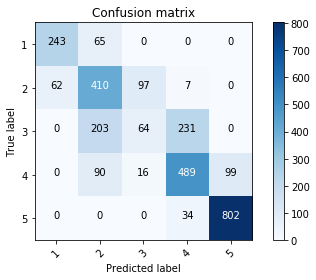

In [12]:
cm = confusion_matrix(y_test,yhat_sk)

#helper function from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

classes = [''+str(i) for i in range(1,6)]
plot_confusion_matrix(cm,classes)

## Classification Report

In [13]:
cr = classification_report(y_test,yhat_sk)
print(cr)

              precision    recall  f1-score   support

         1.0       0.80      0.79      0.79       308
         2.0       0.53      0.71      0.61       576
         3.0       0.36      0.13      0.19       498
         4.0       0.64      0.70      0.67       694
         5.0       0.89      0.96      0.92       836

   micro avg       0.69      0.69      0.69      2912
   macro avg       0.64      0.66      0.64      2912
weighted avg       0.66      0.69      0.66      2912



# Model 2 - PCA (2 components) & Logistic Regression

In [14]:
pca2 = PCA(n_components = 2)
pca2.fit(X_train_scaled)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
X_train_pca2 = pca2.transform(X_train_scaled) 
X_test_pca2 = pca2.transform(X_test_scaled)

In [16]:
log_reg2 = LogisticRegression(random_state=2,solver='newton-cg',multi_class='ovr')
reg2 = log_reg2.fit(X_train_pca2, y_train)
yhat_pca = reg2.predict(X_test_pca2)

## Score

In [17]:
reg2.score(X_test_pca2, y_test)

0.37328296703296704

## Confusion Matrix

Confusion matrix, without normalization
[[122 160   0   1  25]
 [ 97 252   0   0 227]
 [ 40 198   0   4 256]
 [ 25 176   0   2 491]
 [  9 114   0   2 711]]


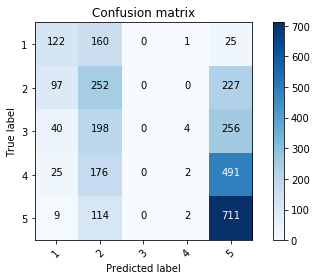

In [18]:
cm2 = confusion_matrix(y_test,yhat_pca)
plot_confusion_matrix(cm2,classes)

## Classification Report

In [19]:
cr2 = classification_report(y_test,yhat_pca)
print(cr2)

              precision    recall  f1-score   support

         1.0       0.42      0.40      0.41       308
         2.0       0.28      0.44      0.34       576
         3.0       0.00      0.00      0.00       498
         4.0       0.22      0.00      0.01       694
         5.0       0.42      0.85      0.56       836

   micro avg       0.37      0.37      0.37      2912
   macro avg       0.27      0.34      0.26      2912
weighted avg       0.27      0.37      0.27      2912



C:\Users\Bob\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model 3 - PCA (16 components) & Logistic Regression

In [20]:
pca16 = PCA(n_components = 16)
pca16.fit(X_train_scaled)

X_train_pca16 = pca16.transform(X_train_scaled) 
X_test_pca16 = pca16.transform(X_test_scaled)

A view of how much variance is explained by each of the principle components.

In [21]:
pca16.explained_variance_ratio_

array([0.23951012, 0.15597368, 0.12584258, 0.1004541 , 0.07143459,
       0.04840559, 0.03890235, 0.03651073, 0.03156984, 0.02780621,
       0.02662631, 0.02407469, 0.02290829, 0.01931879, 0.0162694 ,
       0.00586985])

In [22]:
log_reg16 = LogisticRegression(random_state=2,solver='newton-cg',multi_class='ovr')
reg16 = log_reg.fit(X_train_pca16, y_train)
yhat_pca16 = reg.predict(X_test_pca16)

In [23]:
reg16.score(X_test_pca16, y_test)

0.6850961538461539

Confusion matrix, without normalization
[[239  69   0   0   0]
 [ 62 416  88  10   0]
 [  0 205  61 232   0]
 [  0  94   7 476 117]
 [  0   0   0  33 803]]


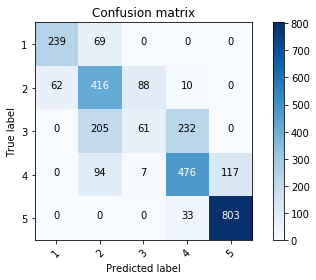

In [24]:
cm16 = confusion_matrix(y_test,yhat_pca16)
plot_confusion_matrix(cm16,classes)

In [25]:
cr16 = classification_report(y_test,yhat_pca16)
print(cr16)

              precision    recall  f1-score   support

         1.0       0.79      0.78      0.78       308
         2.0       0.53      0.72      0.61       576
         3.0       0.39      0.12      0.19       498
         4.0       0.63      0.69      0.66       694
         5.0       0.87      0.96      0.91       836

   micro avg       0.69      0.69      0.69      2912
   macro avg       0.64      0.65      0.63      2912
weighted avg       0.66      0.69      0.66      2912



**Between Model #2 and Model #3, which performed the best?**

Model 3 performed the best. In examining the PCA, we find that a relatively smaller amount of the variance is captured in the first two principal components.

In [26]:
print('Fraction of variance explained by the first two principle components {:.2f}'.format(sum(pca16.explained_variance_ratio_[0:2])))
print('Fraction of variance explained by the sixteen principle components {:.2f}'.format(sum(pca16.explained_variance_ratio_[0:16])))


Fraction of variance explained by the first two principle components 0.40
Fraction of variance explained by the sixteen principle components 0.99


Model 3 was able to perform much better due to having a much higher amount of variance in which to assign the data.